In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../new_modules')
import ObsModels
import utils

import ChemotaxisModels as chem

import FSC as controller

from scipy.optimize import curve_fit
import numba as nb

In [3]:
import torch
import copy

In [7]:
cvalues = np.array([0.1, 1])
features = np.array([np.ones(cvalues.size), cvalues])

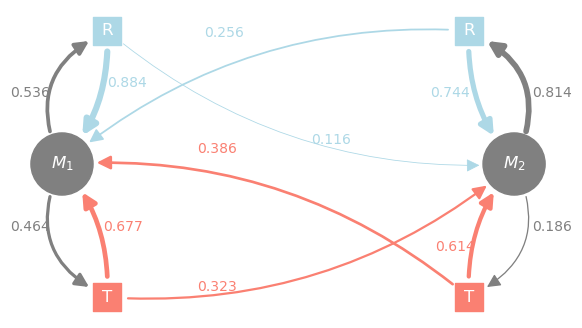

In [13]:
F = 2
M = 2
A = 2

FSC_test = controller.FSC("continuous", M = M, A = A, F = F, mode = "generation")

TMat = FSC_test.get_TMat(features[:, 0])
pi_prob = TMat.sum(axis = 1)
pitilde_prob = TMat / pi_prob[:, None, :]

joint = pi_prob*np.ones(FSC_test.M)[..., None]/FSC_test.M
pA = np.sum(joint, axis = 0)
pM = np.sum(joint, axis = 1)

log_arg = joint / (pA[None, :] * pM[:, None])
MI_memact = np.sum(joint * np.log2(log_arg))
figsize = (7, 4)
fig, ax = plt.subplots(1, 1, figsize = figsize)

utils.plot_FSC_network(ax, pi_prob, pitilde_prob,
                        memory1_color='gray', memory2_color='gray',
                        action_r_color='lightblue', action_t_color='salmon',
                        title = "")

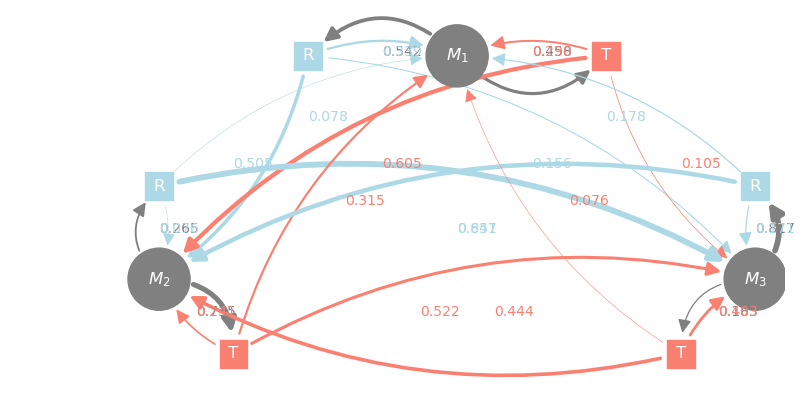

In [32]:
F = 2
M = 3
A = 2

FSC_test = controller.FSC("continuous", M = M, A = A, F = F, mode = "generation")

TMat = FSC_test.get_TMat(features[:, 0])
pi_prob = TMat.sum(axis = 1)
pitilde_prob = TMat / pi_prob[:, None, :]

joint = pi_prob*np.ones(FSC_test.M)[..., None]/FSC_test.M
pA = np.sum(joint, axis = 0)
pM = np.sum(joint, axis = 1)

log_arg = joint / (pA[None, :] * pM[:, None])
MI_memact = np.sum(joint * np.log2(log_arg))
figsize = (15, 5)
fig, ax = plt.subplots(1, 1, figsize = figsize)

utils.plot_FSC_network_3(ax, pi_prob, pitilde_prob,
                        memory1_color='gray', memory2_color='gray', memory3_color='gray',
                        action_r_color='lightblue', action_t_color='salmon',
                        title = "")